In [1]:
from bs4 import BeautifulSoup
from shapely.geometry import Polygon

with open("Population.kml", "r") as f:
    soup = BeautifulSoup(f, "xml")

placemarks = soup.find_all("Placemark")

for placemark in placemarks:
    polygon = placemark.find("Polygon")
    if polygon is not None:
        coords_text = polygon.find("coordinates").text.strip()
        coords_list = [tuple(map(float, coord.split(",")[:2])) for coord in coords_text.split()]
        polygon = Polygon(coords_list)
        # Process the polygon...


In [2]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt


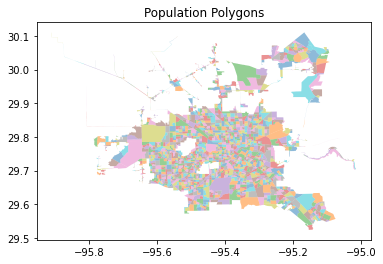

In [5]:
polygons = []
for placemark in placemarks:
    polygon = placemark.find("Polygon")
    if polygon is not None:
        coords_text = polygon.find("coordinates").text.strip()
        coords_list = [tuple(map(float, coord.split(",")[:2])) for coord in coords_text.split()]
        polygons.append(Polygon(coords_list))

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate over the polygons and add them to the plot
for polygon in polygons:
    x,y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.5)

# Add a title and show the plot
plt.title('Population Polygons')
plt.show()

In [6]:
centroids = []
for placemark in placemarks:
    polygon = placemark.find("Polygon")
    if polygon is not None:
        coords_text = polygon.find("coordinates").text.strip()
        coords_list = [tuple(map(float, coord.split(",")[:2])) for coord in coords_text.split()]
        polygon = Polygon(coords_list)
        centroid = polygon.centroid
        centroids.append((centroid.x, centroid.y))

print(centroids)


[(-95.4611351037132, 29.595886636703405), (-95.4628487911804, 29.590425266006466), (-95.45133012419952, 29.587092029713965), (-95.45904621881068, 29.592573193146325), (-95.46683236781969, 29.585072384369234), (-95.4585609276071, 29.58358036658661), (-95.48051705294884, 29.603229799624504), (-95.47109902931541, 29.600436016485187), (-95.47071891122754, 29.594668145436255), (-95.47820382963494, 29.59526669896741), (-95.47667583344366, 29.58629631252667), (-95.48888121465941, 29.604851983735603), (-95.48731627514974, 29.58975635706412), (-95.50300763335521, 29.613191906891487), (-95.50378247000025, 29.60535821555939), (-95.49637777929748, 29.604587610989494), (-95.508233192698, 29.60267572095089), (-95.50885543055244, 29.611446742926503), (-95.51149558374173, 29.585269477744813), (-95.51754247719128, 29.587636563583928), (-95.5067705230327, 29.59703317168769), (-95.49885852274767, 29.58959649992182), (-95.51473275555072, 29.575787428371523), (-95.59683139447125, 29.660526305256543), (-95.

In [8]:
import csv

# Replace 'centroids.csv' with the desired file name and path
with open('centroids.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['index', 'x', 'y'])  # Write column headers
    for index, centroid in enumerate(centroids):
        writer.writerow([index, centroid[0], centroid[1]]) 
